In [3]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [5]:
toyota=df.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [6]:
toyota.rename(columns={"Age_08_04":"Age"},inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [7]:
toyota.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x1d6f352cbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6f353f2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6f352c880>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6f353f9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6f353fd00>],
 'means': []}

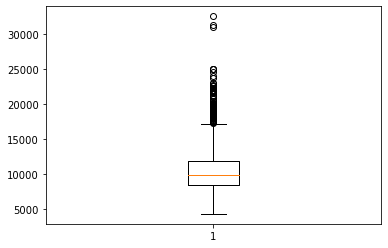

In [8]:
plt.boxplot(toyota["Price"]) #not normally distributed it is having right skew

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6f35d8d00>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6f35e3400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6f35d89a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6f35e3ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6f35e3e20>],
 'means': []}

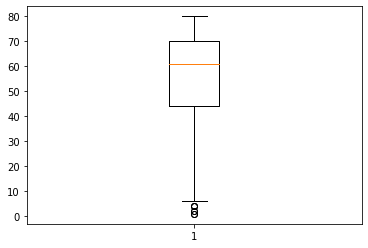

In [9]:
plt.boxplot(toyota["Age"]) #not normally distributed it is having left skew  

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6f3637520>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6f3637be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6f36371c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6f36422e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6f3642640>],
 'means': []}

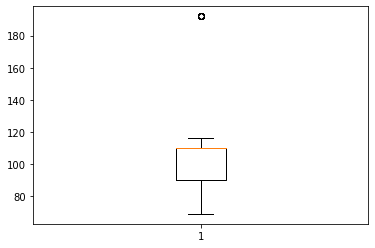

In [10]:
plt.boxplot(toyota["HP"])  #not normally distributed it is having right skew

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6f368ad60>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6f3699460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6f368aa00>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6f3699b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6f3699e80>],
 'means': []}

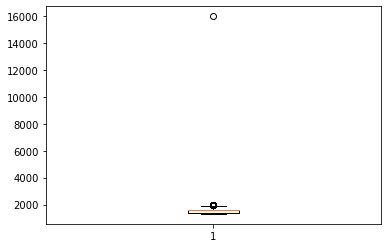

In [11]:
plt.boxplot(toyota["cc"])  # not normally distributed it s having right skew

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6f36ebeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6f36f85b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6f36ebb50>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6f36f8c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6f36f8fd0>],
 'means': []}

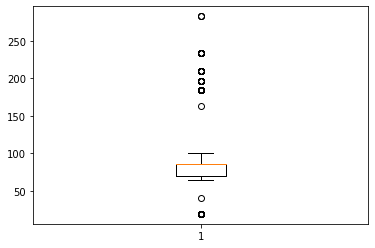

In [12]:
plt.boxplot(toyota["Quarterly_Tax"]) # #not normally distributed it s having right skew

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6f3652f70>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6f3607340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6f3652d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6f33c2fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6f3668430>],
 'means': []}

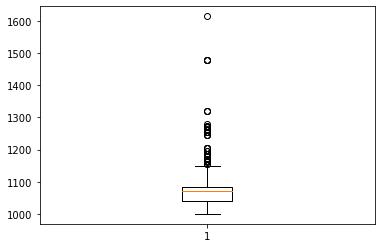

In [13]:
plt.boxplot(toyota["Weight"]) #not normally distributed it s having right skew


{'whiskers': [<matplotlib.lines.Line2D at 0x1d6f3782910>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6f3782fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6f37825b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6f378e6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6f378ea30>],
 'means': []}

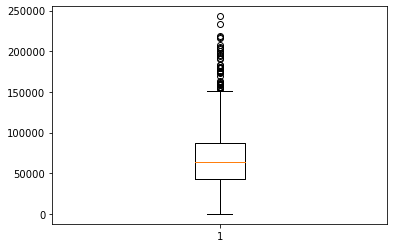

In [14]:
plt.boxplot(toyota["KM"])  #not normally distributed it is having right skew

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6f37daa60>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6f37ea160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6f37da700>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6f37ea820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6f37eab80>],
 'means': []}

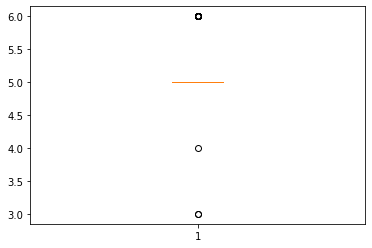

In [15]:
plt.boxplot(toyota["Gears"]) #not normally distributed it is having slightly left skew

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6f383f490>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6f383fb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6f383f130>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6f384a250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6f384a5b0>],
 'means': []}

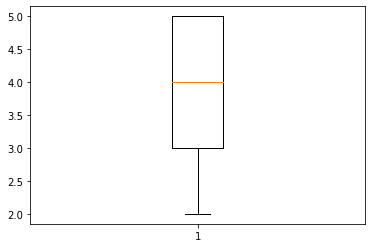

In [16]:
plt.boxplot(toyota["Doors"]) ##not normally distributed it is having  left skew

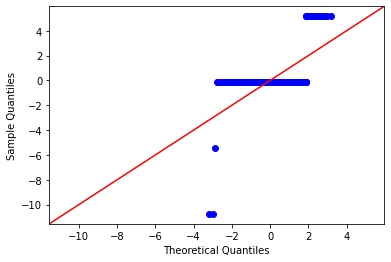

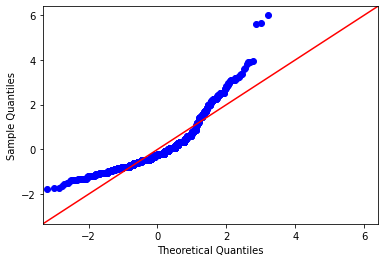

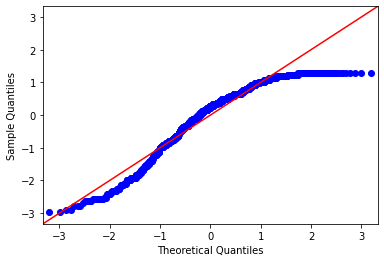

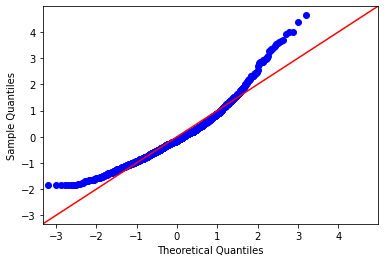

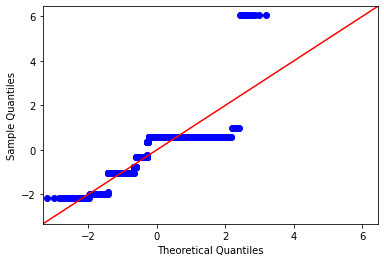

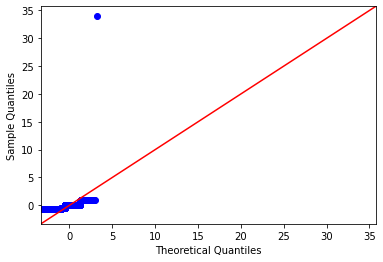

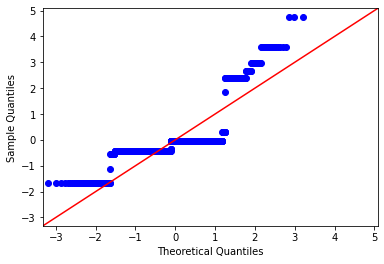

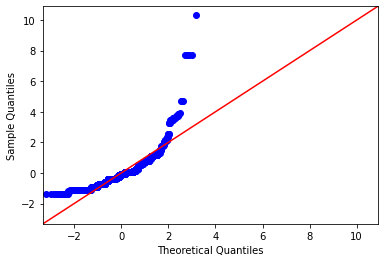

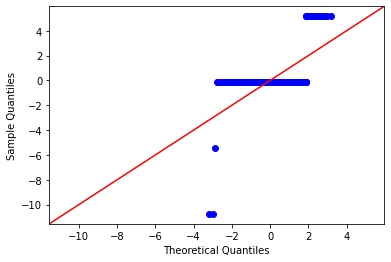

In [17]:
import statsmodels.api as sns
sns.graphics.qqplot(toyota["Price"],fit=True,line='45')#Data is not linear.
sns.graphics.qqplot(toyota["Age"],fit=True,line='45') #Data is not linear
sns.graphics.qqplot(toyota["KM"],fit=True,line='45') #Data is not linear
sns.graphics.qqplot(toyota["HP"],fit=True,line='45') #Data is not linear
sns.graphics.qqplot(toyota["cc"],fit=True,line='45')#Data is not linear
sns.graphics.qqplot(toyota["Quarterly_Tax"],fit=True,line='45')#Data is not linear
sns.graphics.qqplot(toyota["Weight"],fit=True,line='45')#Data is not linear
sns.graphics.qqplot(toyota["Gears"],fit=True,line='45')#Data is not linear

(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <BarContainer object of 10 artists>)

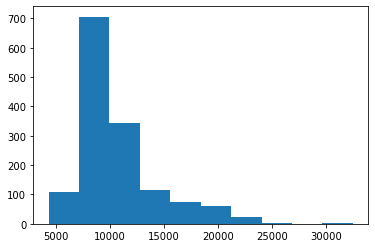

In [18]:
import matplotlib.pyplot as plt
plt.hist(toyota["Price"])#Data is having right skew


(array([ 24.,  36.,  62.,  64., 108., 127., 182., 247., 287., 299.]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <BarContainer object of 10 artists>)

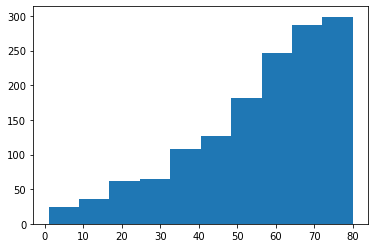

In [19]:
plt.hist(toyota["Age"])#Data is having left skew

(array([109., 285., 166., 865.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([ 69. ,  81.3,  93.6, 105.9, 118.2, 130.5, 142.8, 155.1, 167.4,
        179.7, 192. ]),
 <BarContainer object of 10 artists>)

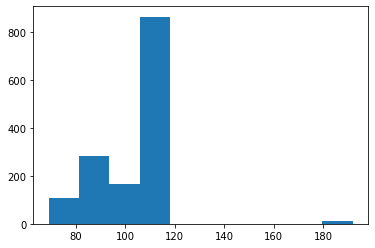

In [20]:
plt.hist(toyota["HP"])#Data is having right skew, uneven distribution.

(array([1.435e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1300.,  2770.,  4240.,  5710.,  7180.,  8650., 10120., 11590.,
        13060., 14530., 16000.]),
 <BarContainer object of 10 artists>)

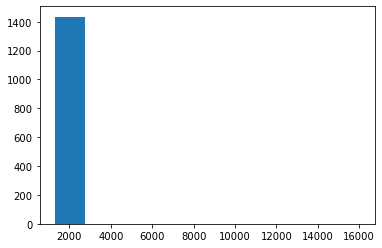

In [21]:
plt.hist(toyota["cc"])#Data is having right skew

(array([ 73., 577., 616.,  19.,   0.,   1., 110.,  18.,  19.,   3.]),
 array([ 19. ,  45.4,  71.8,  98.2, 124.6, 151. , 177.4, 203.8, 230.2,
        256.6, 283. ]),
 <BarContainer object of 10 artists>)

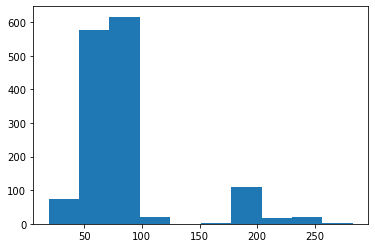

In [22]:
plt.hist(toyota["Quarterly_Tax"])#Data is having right skew

(array([664., 620., 107.,  18.,  19.,   3.,   0.,   4.,   0.,   1.]),
 array([1000. , 1061.5, 1123. , 1184.5, 1246. , 1307.5, 1369. , 1430.5,
        1492. , 1553.5, 1615. ]),
 <BarContainer object of 10 artists>)

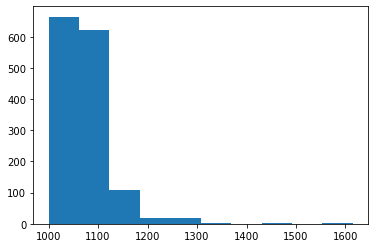

In [23]:
plt.hist(toyota["Weight"])#Data is having right skew

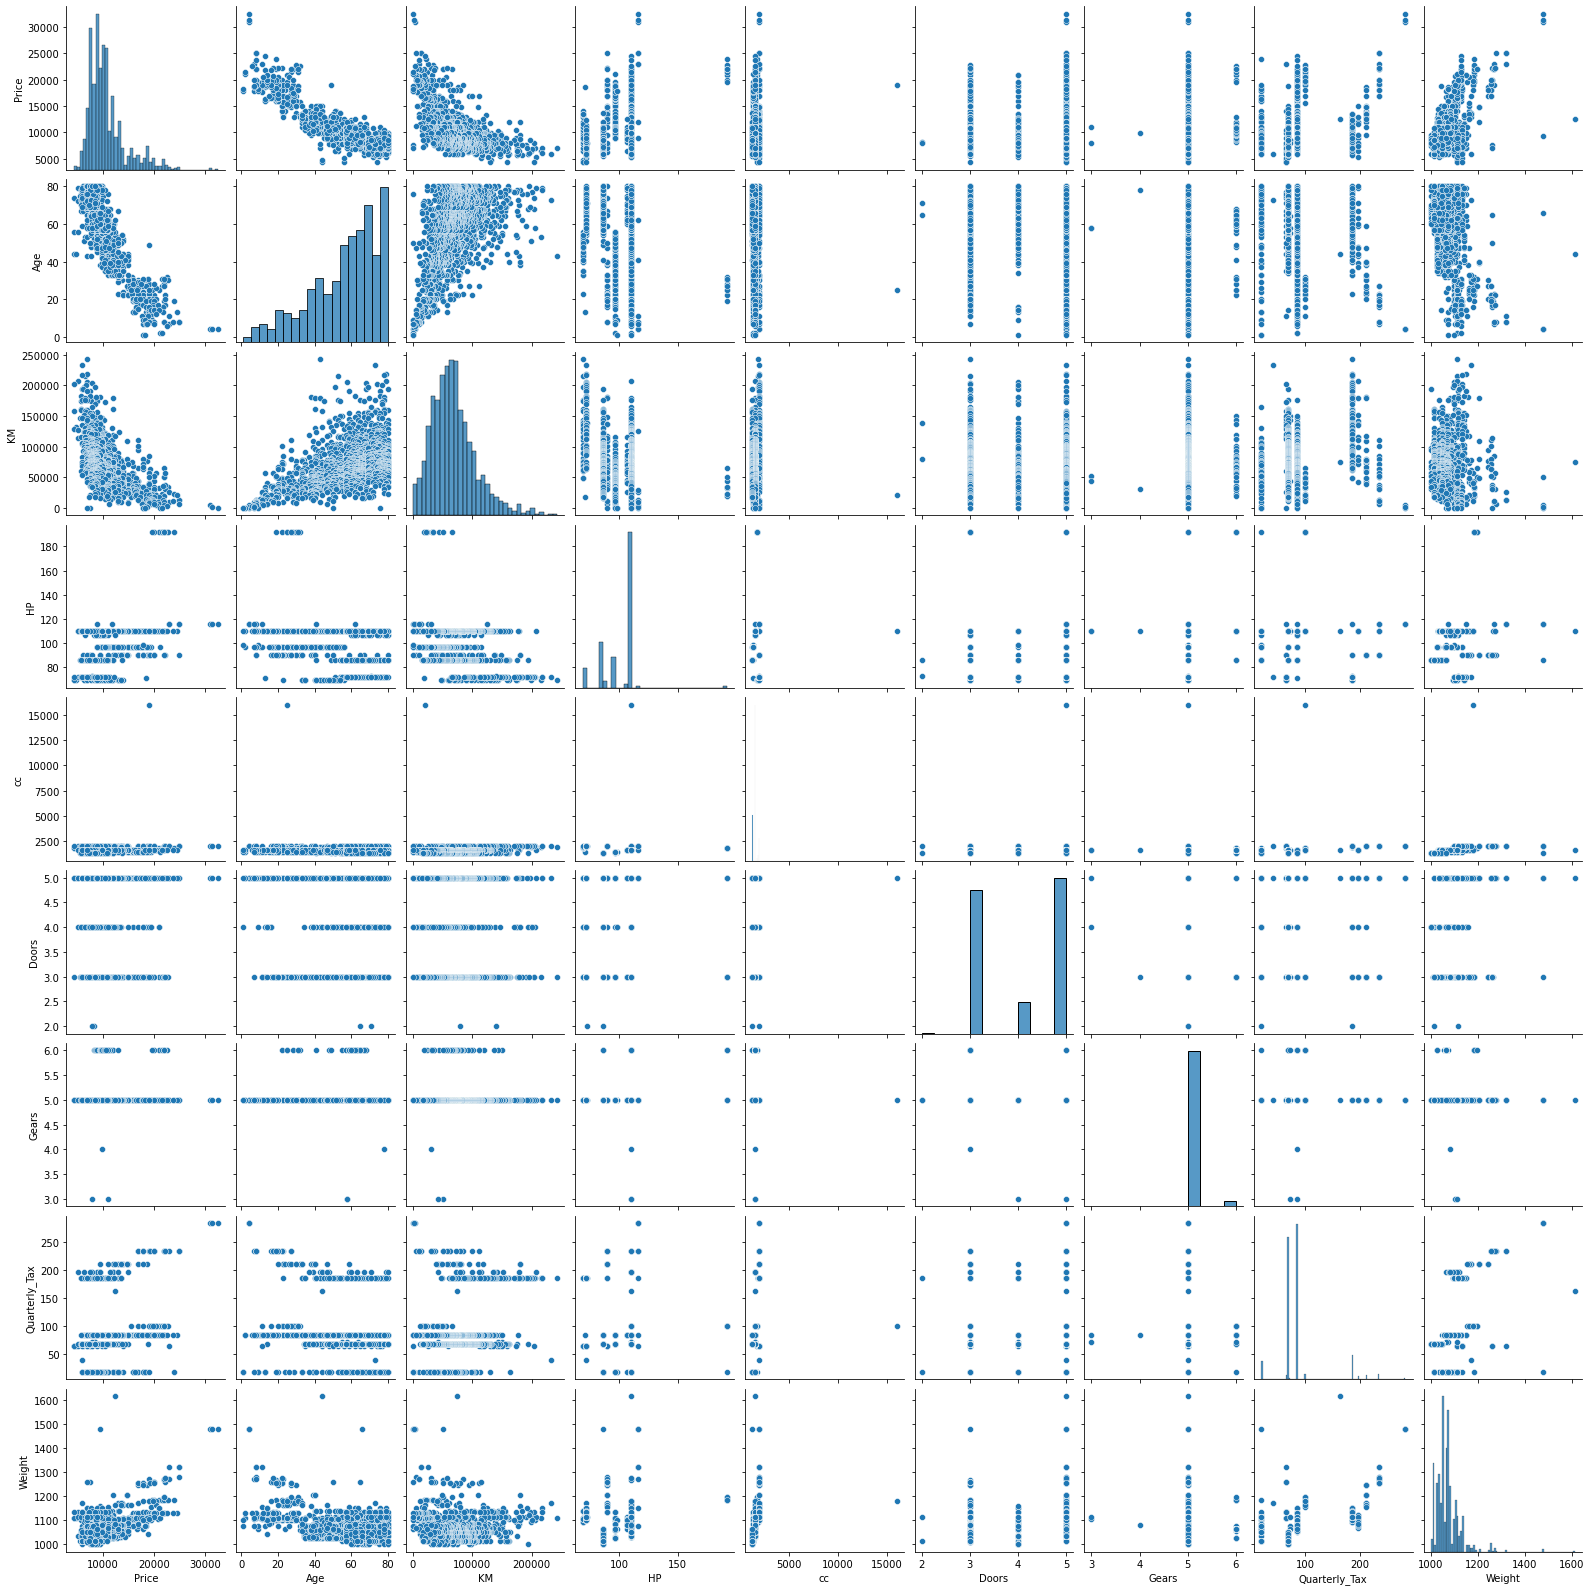

In [24]:
toyota.corr()
import seaborn as sn
sn.pairplot(toyota)
correlation_values= toyota.corr()

In [25]:
#Splitting the data into train & test 
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(toyota)
train_data=train_data.reset_index()
test_data=test_data.reset_index()
train_data1=train_data.drop("index",axis=1)
test_data1=test_data.drop("index",axis=1)

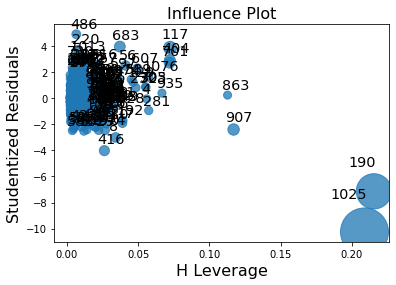

In [26]:

import statsmodels.formula.api as smf
#Model=1
m1=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data= train_data1).fit()
m1.summary()
sns.graphics.influence_plot(m1)
#cc,Doors are insignificant as probability value is greater than 0.05 
#with influence index plot it is observed that observation 348,805 is an influencing index.
#removing  observation
train_data2=train_data1.drop(train_data1.index[[348,805]],axis=0)


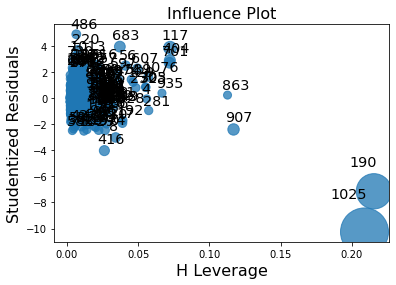

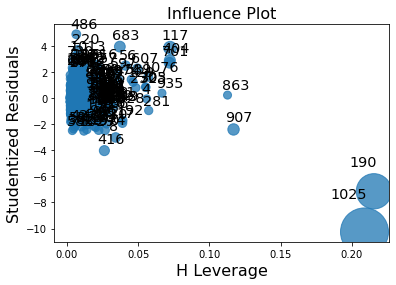

In [27]:
#model=2
m2=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= train_data2).fit()
m2.summary()
#Door is having probability value > 0.05 checking with influence index plot.
sns.graphics.influence_plot(m2)


In [28]:
train_data3=train_data2.drop(train_data2.index[[348,805,468]],axis=0)


In [29]:
#model=3
m3=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= train_data3).fit()
m3.summary() #r-squared=0.878
# As Doors is insignificant.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     933.5
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:53:26   Log-Likelihood:                -9211.8
No. Observations:                1072   AIC:                         1.844e+04
Df Residuals:                    1063   BIC:                         1.849e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7128.8561   1554.686     -4.585      0.000   -1.02e+04   -4078.254
Age            -119.7627      2.968    -40.347      0.000    -125.587    -113.938
KM               -0.0180      0.002    -11.897      0.000      -0.021      -0.015
HP               38.0478      3.380     11.256      0.000      31.415      44.680
cc               -1.9415      0.354     -5.482      0.000      -2.636      -1.247
Doors            -9.0263     45.277     -0.199      0.842     -97.868      79.815
Gears           515.9616    216.385      2.384      0.017      91.372     940.552
Quarterly_Tax     7.6064      1.694      4.490      0.000       4.283      10.930
Weight           20.2885      1.227     16.532      0.000      17.880      22.697
==============================================================================
Omnibus:                      211.555   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2531.242
Skew:                          -0.531   Prob(JB):                         0.00
Kurtosis:                      10.453   Cond. No.                     3.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#Try checking with VIF values
rsq_doors=smf.ols("Doors~Age+KM+HP+Gears+Quarterly_Tax+Weight", data=train_data3).fit().rsquared
Vif_rsq=1/(1-rsq_doors) #1.14

Vif_rsq
#As VIF value of Doors is less than 10. But probability value is more than 0.05.


1.163780329201002

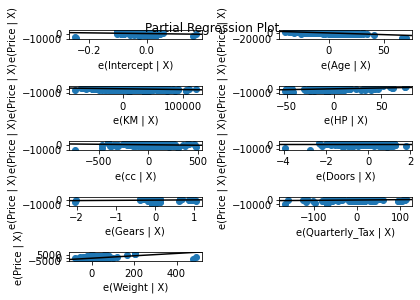

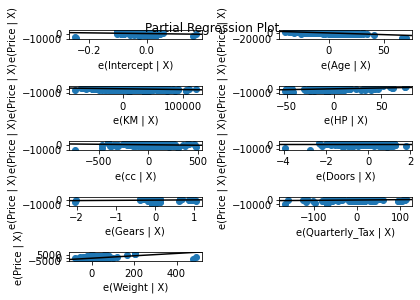

In [31]:
#Checking with AV Plots:
sns.graphics.plot_partregress_grid(m3)

In [32]:

#As preparing the model without Doors and checking the values:
#model4
m4=smf.ols("Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight",data= train_data3).fit()
m4.summary() #r-squared=0.878


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1068.
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:53:28   Log-Likelihood:                -9211.9
No. Observations:                1072   AIC:                         1.844e+04
Df Residuals:                    1064   BIC:                         1.848e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7140.8169   1552.827     -4.599      0.000   -1.02e+04   -4093.866
Age            -119.7540      2.967    -40.367      0.000    -125.575    -113.933
KM               -0.0180      0.002    -11.953      0.000      -0.021      -0.015
HP               37.9771      3.360     11.303      0.000      31.384      44.570
cc               -1.9364      0.353     -5.485      0.000      -2.629      -1.244
Gears           524.2775    212.230      2.470      0.014     107.840     940.715
Quarterly_Tax     7.6177      1.692      4.502      0.000       4.297      10.938
Weight           20.2262      1.186     17.049      0.000      17.898      22.554
==============================================================================
Omnibus:                      209.655   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2483.376
Skew:                          -0.525   Prob(JB):                         0.00
Kurtosis:                      10.382   Cond. No.                     3.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#As all the values are significant.

In [34]:

final_train_data=smf.ols("Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight",data= train_data3).fit()
final_train_data.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1068.
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:53:28   Log-Likelihood:                -9211.9
No. Observations:                1072   AIC:                         1.844e+04
Df Residuals:                    1064   BIC:                         1.848e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7140.8169   1552.827     -4.599      0.000   -1.02e+04   -4093.866
Age            -119.7540      2.967    -40.367      0.000    -125.575    -113.933
KM               -0.0180      0.002    -11.953      0.000      -0.021      -0.015
HP               37.9771      3.360     11.303      0.000      31.384      44.570
cc               -1.9364      0.353     -5.485      0.000      -2.629      -1.244
Gears           524.2775    212.230      2.470      0.014     107.840     940.715
Quarterly_Tax     7.6177      1.692      4.502      0.000       4.297      10.938
Weight           20.2262      1.186     17.049      0.000      17.898      22.554
==============================================================================
Omnibus:                      209.655   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2483.376
Skew:                          -0.525   Prob(JB):                         0.00
Kurtosis:                      10.382   Cond. No.                     3.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#Train model predaction
Train_pred = final_train_data.predict(train_data3)
#Train Residuals
Train_residuals=train_data3["Price"]-Train_pred
#Train Rmse
Train_rmse=np.sqrt(np.mean(Train_residuals*Train_residuals))

In [36]:
#Test Prediction
Test_pred=final_train_data.predict(test_data1)
#Test Residuals
Test_residuals=test_data1["Price"]-Test_pred
#Test Rmse
Test_rmse=np.sqrt(np.mean(Test_residuals*Test_residuals))

In [37]:

#Checking with original model
toyota1=toyota.drop(toyota.index[[80,221,601]], axis=0)

In [38]:
final_model=smf.ols("Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight",data= toyota1).fit()
final_model.summary()  #rsquared-0.881
best_model=final_model.predict(toyota1)

Text(0, 0.5, 'Predicted values')

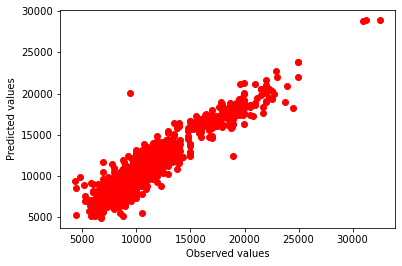

In [39]:
#Linearity
plt.scatter(toyota1["Price"],best_model,c='r');plt.xlabel("Observed values");plt.ylabel("Predicted values")

Text(0, 0.5, 'Residuals')

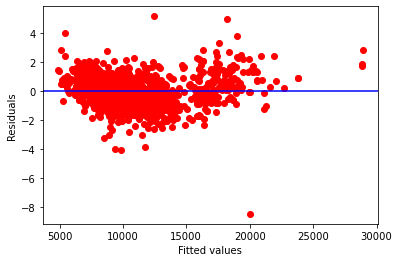

In [40]:

# Residuals v/s Fitted values
plt.scatter(best_model,final_model.resid_pearson,c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")

(array([  1.,   0.,   0.,   5.,  55., 480., 717., 162.,  10.,   3.]),
 array([-8.46734172, -7.10183465, -5.73632757, -4.3708205 , -3.00531343,
        -1.63980636, -0.27429929,  1.09120779,  2.45671486,  3.82222193,
         5.187729  ]),
 <BarContainer object of 10 artists>)

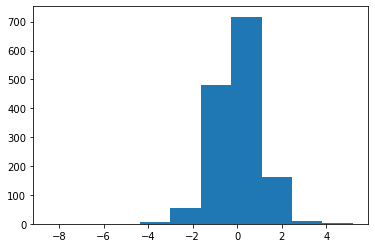

In [41]:
plt.hist(final_model.resid_pearson) 
#Errors are normally distributed.

((array([-3.29990572, -3.0423199 , -2.89905096, ...,  2.89905096,
          3.0423199 ,  3.29990572]),
  array([-8.46734172, -4.08365184, -4.01333403, ...,  4.02718957,
          5.00442131,  5.187729  ])),
 (0.981720669931776, 1.097593276706814e-12, 0.9824783701051769))

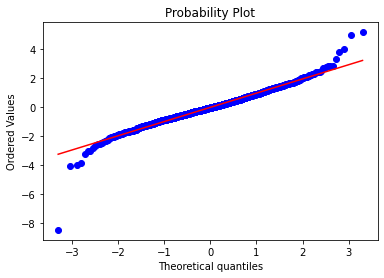

In [42]:

import pylab
import scipy.stats as st
st.probplot(final_model.resid_pearson, dist='norm',plot=pylab)
## Errors are normally distributed